# Load Data

In [5]:
pwd # current directory

'C:\\Users\\17812\\Documents\\GitHub\\healthcare\\dev\\kailun'

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
filename= r'diabetic_data.csv'
train_data = pd.read_csv(filename)

In [24]:
train_data.shape

(101766, 51)

Requirments for extraction of initial dataset from database:

1) Hospital admission 
2) Any kind of diabetes diagnosis
3) Length of stay > 1 day, < 14 days
4) Lab tests were performed in hospital 
5) Medications were given in hospital

In [5]:
train_data.sample(100)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
48680,148213278,96114159,Caucasian,Male,[60-70),?,2,1,1,2,...,No,No,No,No,No,No,No,No,No,<30
59736,167756610,57330774,Caucasian,Female,[70-80),?,1,2,1,2,...,No,No,No,No,No,No,No,Ch,Yes,<30
10765,45234174,5665563,Caucasian,Female,[60-70),?,3,18,1,5,...,No,No,No,No,No,No,No,Ch,Yes,NO
62389,173792916,55573956,Caucasian,Male,[50-60),?,1,1,7,5,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6658,32723076,18326295,Caucasian,Female,[70-80),?,1,3,5,3,...,No,No,No,No,No,No,No,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52075,154548282,85435371,Caucasian,Male,[50-60),?,3,6,1,5,...,No,No,No,No,No,No,No,No,Yes,>30
57967,164827188,28927890,Caucasian,Female,[30-40),?,2,1,1,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
47474,145920318,84318147,Caucasian,Male,[60-70),?,2,1,1,5,...,No,No,No,No,No,No,No,No,Yes,>30
13477,53568414,1256940,AfricanAmerican,Female,[40-50),?,2,18,1,8,...,No,No,No,No,No,No,No,No,No,>30


In [0]:
train_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
train_data.shape  # There are 101766 rows and 50 columns 

(101766, 50)

For the variables I'm examinging, break down into two groups, drug_var and nom_var.  The drugs are a subset of drugs that are administered during the hospital encounter.  

drug_var=['miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 
          'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']

nom_var=['change', 'diabetesMed', 'readmitted']

In [30]:
#np.sum(train_data.isnull(), axis=0)
train_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [13]:
train_data[train_data['weight']=='?']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Examine the predictor variable 

In [6]:
train_data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Based on the value counts above, we observe three levels of readmitted status.  About 10% of patients are readmitted within 30 days of hospital encounter.  Let's feature engineer the variable 'readmitted' to be strictly categorical 0 or 1.  

In [7]:
train_data['readmitted_yes'] = pd.Series(len(train_data['readmitted']), index=train_data.index)
train_data['readmitted_yes']= 0
train_data.loc[train_data['readmitted']== '<30','readmitted_yes'] = 1

## Variable counts for readmitted_yes vs readmitted_no 

In [8]:
nom_var=['A1Cresult','change', 'diabetesMed', 'readmitted', 'readmitted_yes']

In [9]:
train_data_nom_var= pd.DataFrame(train_data, columns=nom_var)

In [10]:
for col in nom_var:
    print(train_data_nom_var[col].value_counts())

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64
No    54755
Ch    47011
Name: change, dtype: int64
Yes    78363
No     23403
Name: diabetesMed, dtype: int64
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
0    90409
1    11357
Name: readmitted_yes, dtype: int64


In [59]:
nom_var[0:3]

['A1Cresult', 'change', 'diabetesMed']

<Figure size 1080x4320 with 0 Axes>

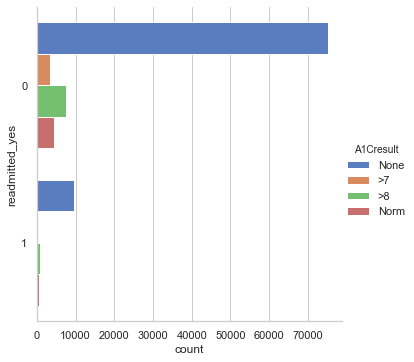

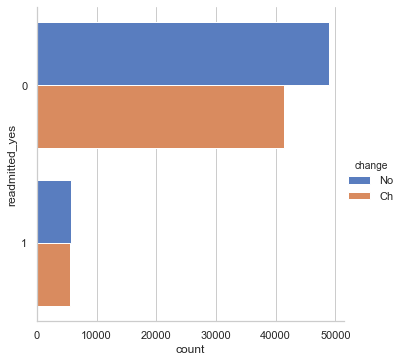

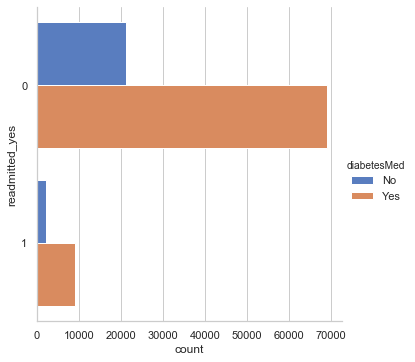

In [78]:
plt.figure(figsize=(15, 60))
for idx, col in enumerate(nom_var[0:3]):
    sns.catplot(y="readmitted_yes", hue=nom_var[idx], kind= "count", palette="muted", data=train_data_nom_var)

<Figure size 1152x5400 with 0 Axes>

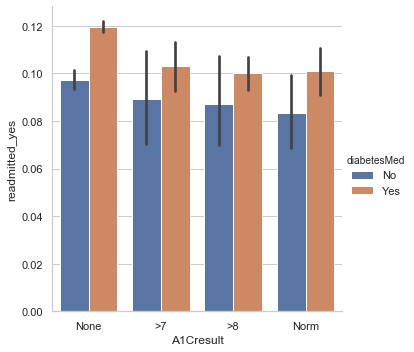

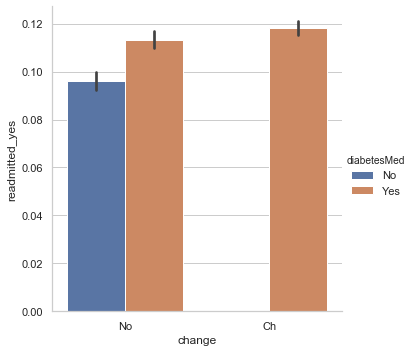

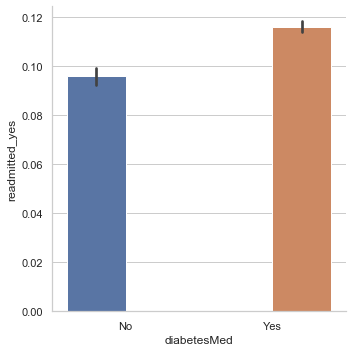

In [11]:
plt.figure(figsize=(16, 75))
for idx, col in enumerate(nom_var[0:3]):
    #plt.subplot(18, 2, idx + 1)
    sns.catplot(x=col, y="readmitted_yes", hue= "diabetesMed", data=train_data_nom_var, kind="bar")